## Imports


In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [13]:
df=pd.read_csv(r"C:\Users\Pavitra\Downloads\Py_DS_ML_Bootcamp-master\Machine Learing DS\Linear_Regression_Dataset_Ecommerce Customers")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [15]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis
Comparing the Time on Website and Yearly Amount Spent columns.

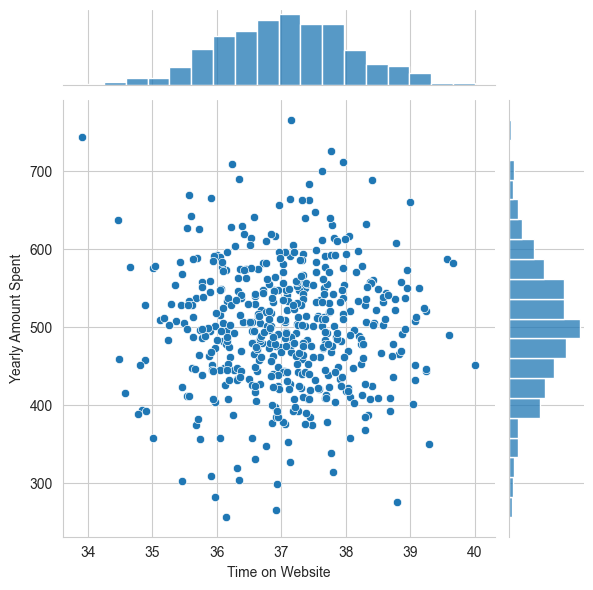

In [16]:
sns.jointplot(data=df,x="Time on Website",y="Yearly Amount Spent",kind = "scatter")
plt.show()

**  the same but with the Time on App column instead. **

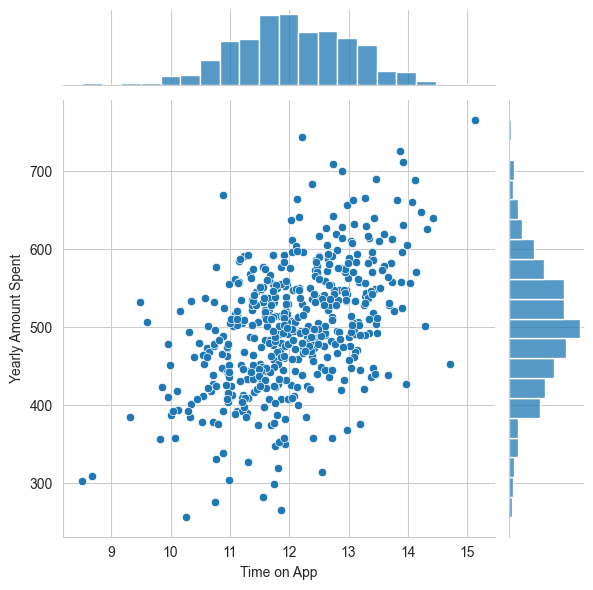

In [17]:
sns.jointplot(data=df,x="Time on App",y="Yearly Amount Spent",kind = "scatter")
plt.show()

**  jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

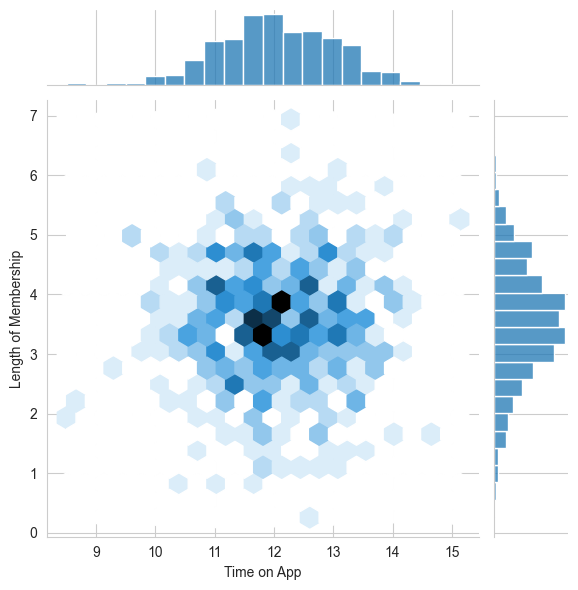

In [18]:
sns.jointplot(data=df,x="Time on App",y="Length of Membership",kind = "hex")
plt.show()

** exploring these types of relationships across the entire data set.**

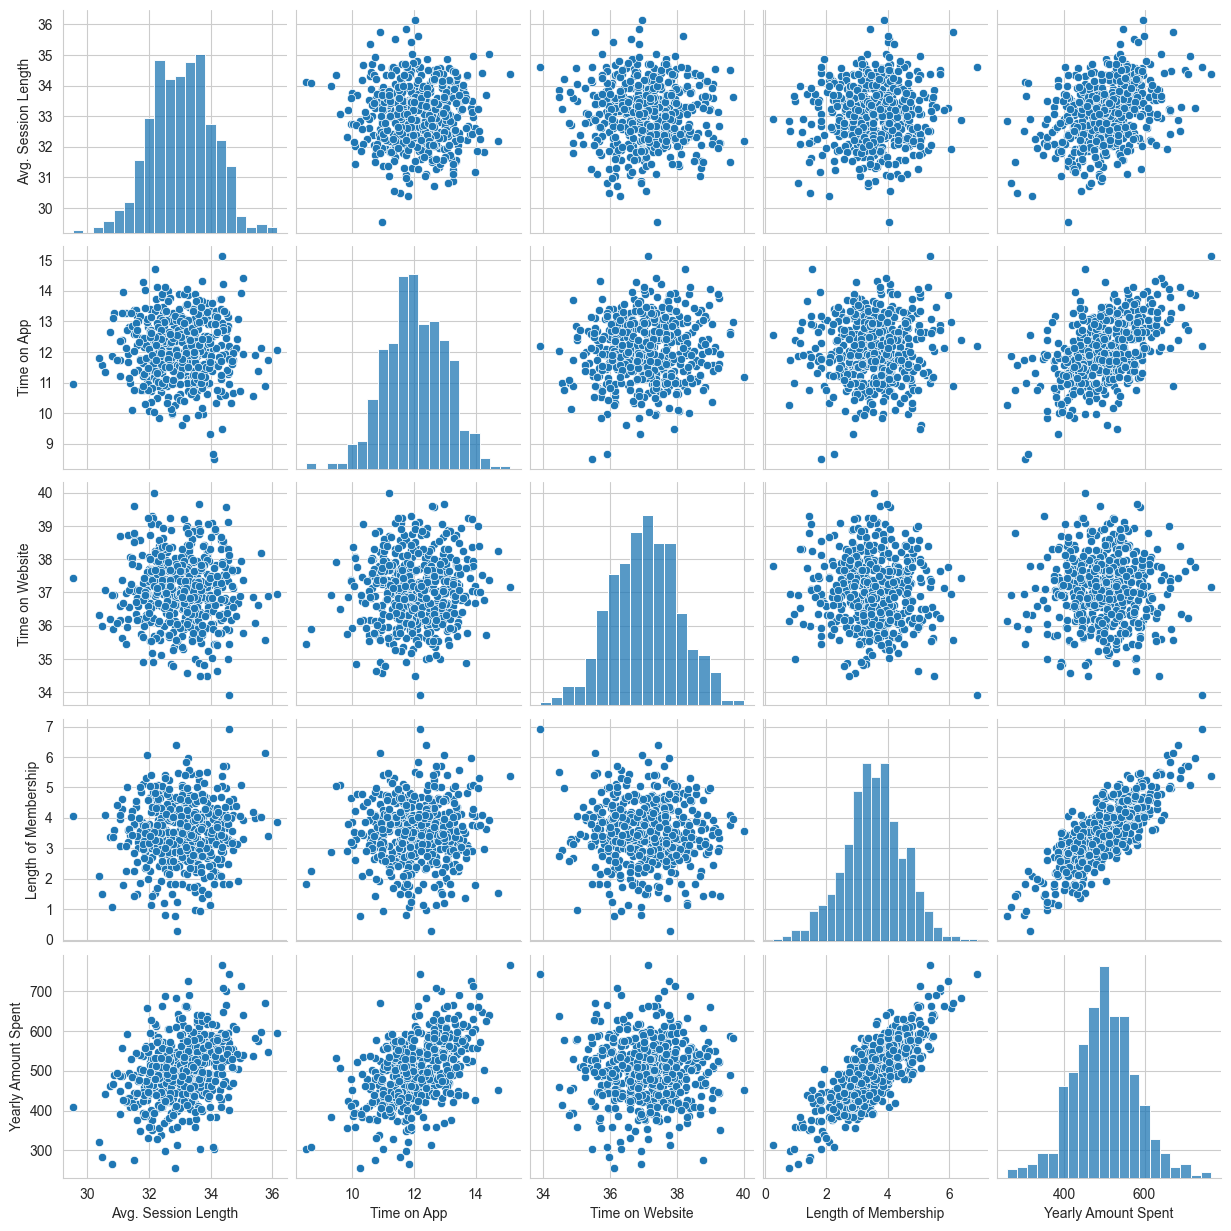

In [19]:
sns.pairplot(data=df)
plt.show()

>>>**Based off this plot Length of Membership looks to be the most correlated feature with Yearly Amount Spent.**

** a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

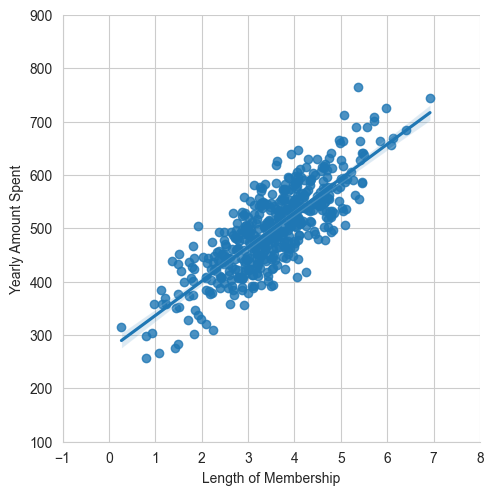

In [20]:
sns.set_style("whitegrid")
g=sns.lmplot(data=df,x="Length of Membership",y="Yearly Amount Spent")
g.set(xlim=(-1, 8), ylim=(100, 900))
plt.show()

## Training and Testing Data


In [21]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x=df.drop(["Email","Address","Avatar","Yearly Amount Spent"],axis=1)
y=df["Yearly Amount Spent"]
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [24]:
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=101)

## Training the Model



In [25]:
from sklearn.linear_model import LinearRegression


In [26]:
lm=LinearRegression()

In [27]:
lm.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**coefficients of the model**

In [28]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data


In [29]:
predictions=lm.predict(x_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

**  a scatterplot of the real test values versus the predicted values. **

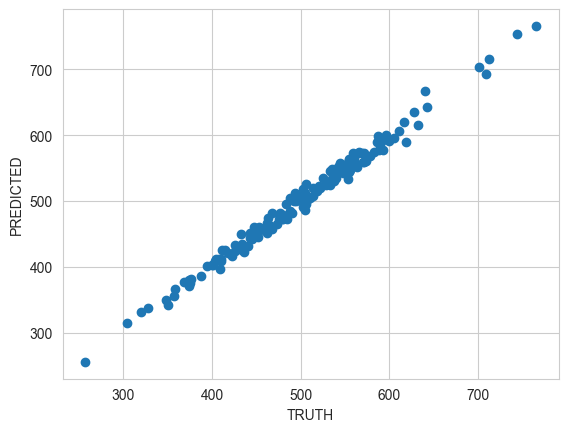

In [30]:
plt.scatter(x=y_test,y=predictions)
plt.xlabel("TRUTH")
plt.ylabel("PREDICTED")
plt.show()

## Evaluating the Model



In [74]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430845
MSE: 79.81305165097454
RMSE: 8.933815066978639


## Residuals



C:\Users\Pavitra\AppData\Local\Temp\ipykernel_54692\2700717073.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((predictions-y_test),bins=50)


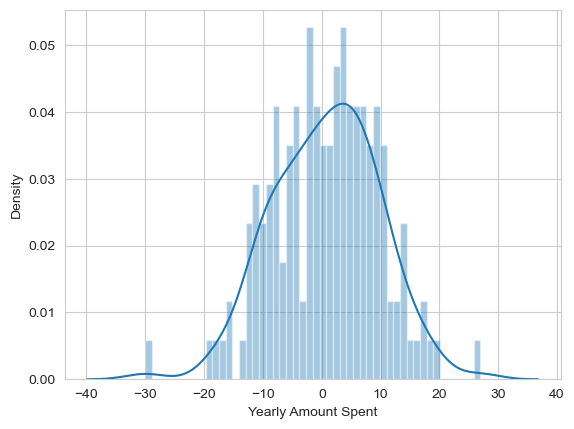

In [77]:
sns.distplot((predictions-y_test),bins=50)
plt.show()

## Conclusion


In [80]:
a=pd.DataFrame(data=lm.coef_ ,index=x.columns,columns=['WEIGHTS'])
a

,WEIGHTS
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** Final verdict : mobile app or website?**

Can be answered in multiple ways based on person , one can say that the company should focus on increasing the LENGTH OF MEMBERSHIP rather than exclusively focusing on   mobile app or on their website .

One can also say that the company needs to focus on increasing the traffic on their WEBSITE one conversely oe can also say that the company should focus on their APP which is shown to have a much better traffic based on records .

One can also say that , though the AVG. SESSION LENGTH does not purely positively correlate with the YEARLY AMOUNT SPENT but the it has been seen that as the AVG. SESSION LENGTH increases the YEARLY AMOUNT SPENT also fairly increases with max YEARLY AMOUNT SPENT seen to be at  AVG. SESSION LENGTH = 34-35 and the min.  YEARLY AMOUNT SPENT seen to be at  AVG. SESSION LENGTH = 30-31

### END